### Task - Classification Model

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

####Data Filtering

In [11]:
# Reading data from the csv file
df = pd.read_csv("/content/clustering_data.csv" , low_memory=False)

# filtering the dataframe
df = df[df["StateName"] == "TELANGANA"]

# Removing the rows with Nan
filtered_df = df.dropna(subset = ["Latitude" , "Longitude" , "Pincode"])

# Converting the type of Latitude, Longitude and Pincode from string to float
filtered_df.loc[:, "Latitude"] = filtered_df["Latitude"].astype(float)
filtered_df.loc[:, "Longitude"] = filtered_df["Longitude"].astype(float)
filtered_df.loc[:, "Pincode"] = filtered_df["Pincode"].astype(float)




# Conditioning on the values of Latitude ang Longitude
filtered_df_with_la_condition = (filtered_df["Latitude"] > 15.5 ) & ( filtered_df["Latitude"] < 20)
filtered_df_with_lon_condition = (filtered_df["Longitude"] > 77 ) & (filtered_df["Longitude"] < 82 )

filtered_df_with_condition = filtered_df[filtered_df_with_la_condition & filtered_df_with_lon_condition]


latitudes = filtered_df_with_condition["Latitude"].to_numpy()

longitudes = filtered_df_with_condition["Longitude"].to_numpy()

pincodes = filtered_df_with_condition["Pincode"].to_numpy()



#### Data Visualization

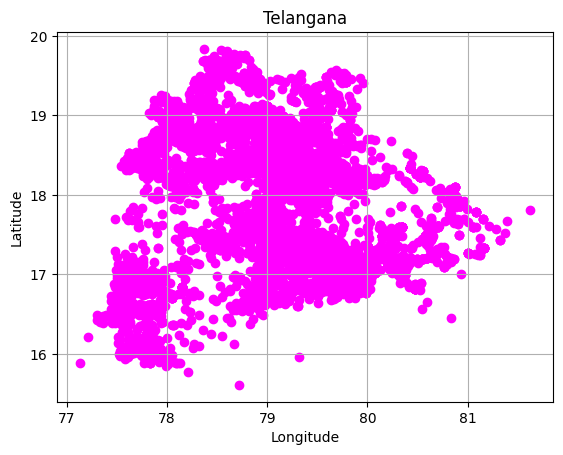

In [12]:
# Plotting the graph between Latitude Vs Longitude

plt.scatter(longitudes,latitudes,color = "Magenta")
plt.title("Telangana")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid()
plt.show()

#### K-Means Clustering

In [38]:
# Implementing the K-Means Clustering algorithm


# Finding the indices of nearest centroid point for each coordinate and the corresponding min_distance
def nearestCentroidForPoint(centroids , coordinates):

  distances = np.zeros(len(centroids))
  min_distances = np.zeros(len(coordinates))

  indices = np.zeros(len(coordinates))

  for j in range(len(coordinates)):
    for i in range(len(centroids)):
      distances[i] = np.linalg.norm(centroids[i] - coordinates[j])
    indices[j] = np.argmin(distances)
    min_distances[j] = min(distances)


  return indices , min_distances



# Finding the centroids to which the algorithm converges
def kMeansAlgorithm( latitudes , longitudes, k , threshold ):

  coordinates = np.column_stack((latitudes , longitudes))

  #print(coordinates.shape)

  number_of_points = len(latitudes)

  # Choosing K random points from coordinates
  indices_of_K_random_points = np.random.choice(range(number_of_points) , size = k , replace = False)

  centroids = coordinates[indices_of_K_random_points]

  new_centroids = np.zeros((k,2))

  while(1):

    index_of_cluster , nearest_distances = nearestCentroidForPoint(centroids , coordinates)


    for i in range(k):

      indices_of_clusteri = np.where(index_of_cluster == i)

      new_centroids[i] = np.mean(coordinates[indices_of_clusteri],axis = 0)


    if(np.allclose(centroids,new_centroids,threshold)):
      loss = np.mean(nearest_distances ** 2)
      return new_centroids , index_of_cluster , loss
    else:
      centroids = new_centroids


### Results of K-Means Clustering

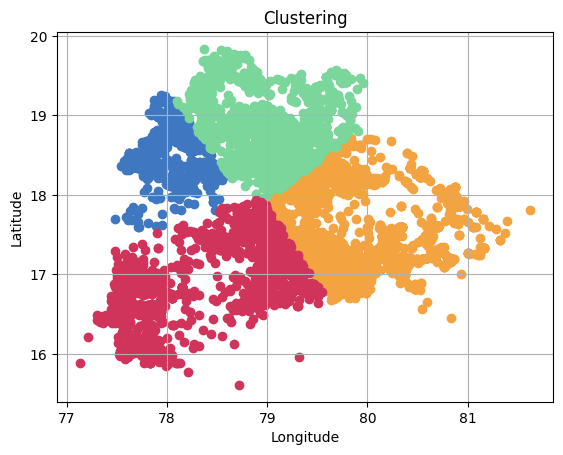

In [44]:

# Plotting the graph

colors = ['#3f78c1', '#f4a341', '#7ad69a', '#d1345b', '#bd68f2',
 '#6ec2c9', '#ef476f', '#ffd166', '#06d6a0', '#118ab2',
 '#073b4c', '#8e44ad', '#e67e22', '#2ecc71', '#3498db',
 '#e74c3c', '#1abc9c', '#9b59b6', '#f39c12', '#16a085',
 '#27ae60', '#2980b9', '#d35400', '#c0392b', '#7f8c8d',
 '#ff6b6b', '#ffa502', '#70a1ff', '#2ed573', '#5352ed']

# Implementing K-Means for k=4

k = 4
centroids , indices_of_point , nearest_distances = kMeansAlgorithm(latitudes , longitudes , 4 , 0.0001)


for i in range(k):
  indices_of_clusteri = np.where(indices_of_point == i)
  plt.scatter(longitudes[indices_of_clusteri] , latitudes[indices_of_clusteri] , color = colors[i] )


plt.grid()
plt.title(f"Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()




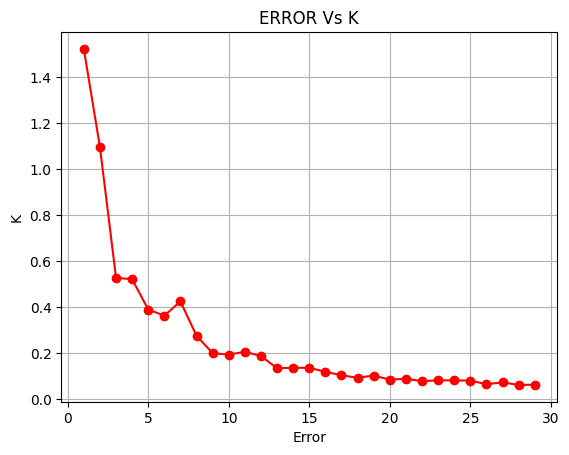

In [46]:
# Finding the optimum value of k

errors = np.array([ kMeansAlgorithm(latitudes , longitudes , k ,0.0001)[2] for k in range(1,30)])


plt.plot( np.array([ i for i in range(1,30) ]) , errors , "ro-" )

plt.grid()
plt.title("ERROR Vs K")
plt.xlabel("Error")
plt.ylabel("K")
plt.show()





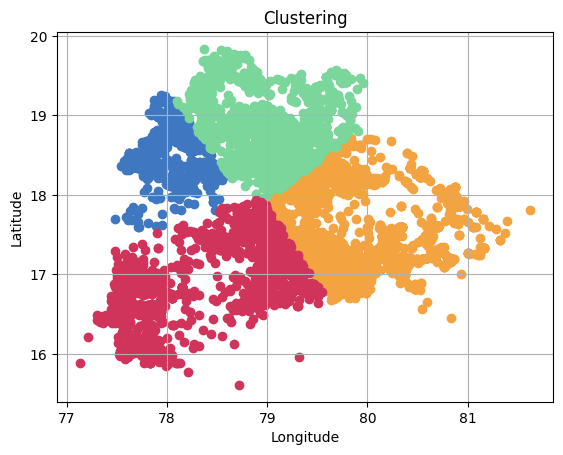

In [49]:
Optimum_k = 5
# From above , K = 5 forms the elbow

new_indices = kMeansAlgorithm(latitudes , longitudes , Optimum_k , 0.0001)

for i in range(Optimum_k):
  indices_of_clusteri = np.where(indices_of_point == i)
  plt.scatter(longitudes[indices_of_clusteri] , latitudes[indices_of_clusteri] , color = colors[i] )


plt.grid()
plt.title(f"Clustering")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()